<a href="https://colab.research.google.com/github/rajlm10/Image_Understanding/blob/main/Image_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import cv2

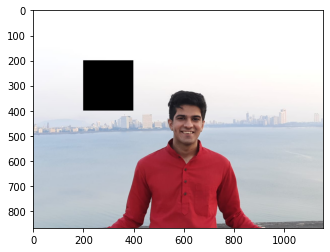

In [ ]:
im=plt.imread('/content/me.jpg') #Read only variable, in opencv you can write it
im2=im.copy()
im2[200:400,200:400,:]=0
plt.imshow(im2)

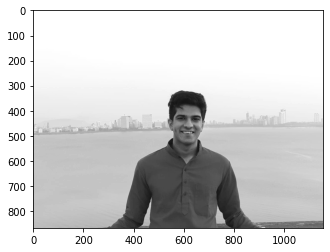

In [ ]:
im=cv2.imread('/content/me.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(im,cmap='gray')

In [ ]:
# from google.colab.patches import cv2_imshow
# cv2_imshow(im)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
cv2.imwrite('me_gray.jpg',im)

True

<Figure size 432x288 with 0 Axes>

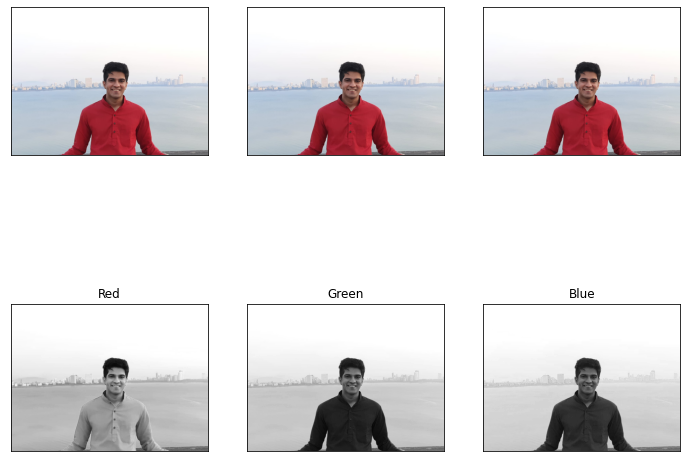

In [ ]:
im=cv2.imread('/content/me.jpg')
im=im[:,:,::-1]

R=im[:,:,0]
G=im[:,:,1]
B=im[:,:,2]

plt.figure(1)
plt.figure(figsize=(12,10))

plt.subplot(231)
plt.imshow(im)
plt.xticks([])
plt.yticks([])

plt.subplot(232)
plt.imshow(im)
plt.xticks([])
plt.yticks([])

plt.subplot(233)
plt.imshow(im)
plt.xticks([])
plt.yticks([])

plt.subplot(234)
plt.imshow(R,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Red')

plt.subplot(235)
plt.imshow(G,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Green')

plt.subplot(236)
plt.imshow(B,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Blue')

plt.show()

# **RGB TO HSV**

In [ ]:
def f_rgb_to_hsv(r, g, b,scaleFactor):
    r, g, b = r / 255.0, g / 255.0, b / 255.0
    cmax = max(r, g, b)    # maximum of r, g, b
    cmin = min(r, g, b)    # minimum of r, g, b
    diff = cmax-cmin       # diff of cmax and cmin.
    if cmax == cmin:
        h = 0
    elif cmax == r:
        h = (60 * ((g - b) / diff) + 0) % 360
    elif cmax == g:
        h = (60 * ((b - r) / diff) + 120) % 360
    elif cmax == b:
        h = (60 * ((r - g) / diff) + 240) % 360

    if h < 0:
        h = h + 360
    if cmax == 0:
        s = 0
    else:
        s = (diff / cmax) * scaleFactor
    v = cmax * scaleFactor
    return h, s, v

In [ ]:
print(f_rgb_to_hsv(100,200,50,100))

(100.0, 75.0, 78.43137254901961)


In [ ]:
im_hsv=cv2.cvtColor(im,cv2.COLOR_RGB2HSV)

# **Segment my Kurta (red)**

In [ ]:
import numpy as np

lr = np.array([0,120,70])
ur = np.array([5,255,255])
mask1 = cv2.inRange(im_hsv,lr,ur)

lr = np.array([175,120,70])
ur = np.array([180,255,255])
mask2 = cv2.inRange(im_hsv,lr,ur)

mask = mask1 | mask2

res = cv2.bitwise_and(im,im,mask=mask)



<Figure size 432x288 with 0 Axes>

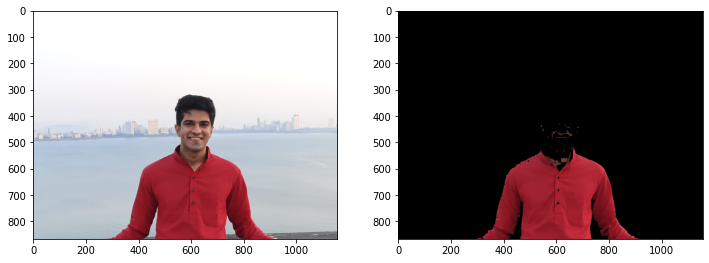

In [ ]:
plt.figure(1)
plt.figure(figsize=(12,10))
plt.subplot(121)
plt.imshow(im)
plt.subplot(122)
plt.imshow(res)
plt.show()

<Figure size 432x288 with 0 Axes>

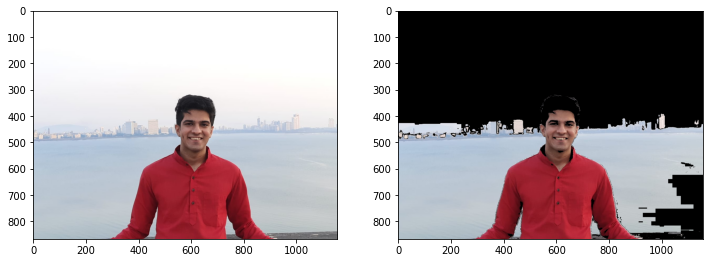

In [ ]:
import numpy as np

lr = np.array([0,10,70])
ur = np.array([180,255,255])
mask1 = cv2.inRange(im_hsv,lr,ur)


res = cv2.bitwise_and(im,im,mask=mask1)

plt.figure(1)
plt.figure(figsize=(12,10))
plt.subplot(121)
plt.imshow(im)
plt.subplot(122)
plt.imshow(res)
plt.show()